Top <font color="blue"></font> <a name='Top' />

In [1]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

<a href=#ImpLibHlprFunc>Importing Libraries & Helper Functions </a><br>
<a href=#EDA>EDA</a><br>


<a href=#Top>Top</a>

Importing Libraries & Helper Functions<font color="blue"></font> <a name='ImpLibHlprFunc' />

In [2]:
# Importing necessary libraries
import os
import numpy as np
import pandas as pd

import statsmodels.api as sm
#from sklearn.metrics import mean_squared_error
#from math import sqrt

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model, svm
#from sklearn.linear_model import LinearRegression, Lasso

from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score #, r2_score

#from sklearn.svm import SVR
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import GridSearchCV

In [3]:
# helper functions
# 1) PrintSeparator to print lines of repeated characters passed as the second parameter for the number of lines passed in the first parameters
def PrintSeparator(nLines=1,ch='-'):
  for i in range(nLines):
    print(ch*100)

def cus_print(var):
  print("numpy_array of type:" , type(var))
  PrintSeparator(nLines=1)
  print(var)
  PrintSeparator(nLines=2,ch='=')

def cus_print_numpyarray(npAr, printArFlag=False):
  print("ndim:", npAr.ndim, ", shape: ",npAr.shape)
  PrintSeparator(nLines=1)
  if printArFlag:
    print(npAr)
  else:
    print("first_element=", npAr[0], "last elemnent=" , npAr[len(npAr)-1])

  PrintSeparator(nLines=2,ch='=')

In [4]:
# for each column, display column name & its distinct contents ONLY in case the column has less than 6 unique values
def get_columns_and_distinct_values(df,nunique_target=5):
  str_=""
  ret=[]
  for column in df:
      columnSeriesObj = df[column]
      nunique_this_clmn = columnSeriesObj.nunique()
      str_ = 'Column Name: ' + column + ', Column Type: ' + str(df[column].dtype)
      if nunique_this_clmn == 1:
          str_ = str_ + ', Column has one unique value only and can be dropped from the dataframe'
          ret.append(str_)
          ret.append("------------------------------------------------------------")
      elif nunique_this_clmn <= nunique_target:
        str_ = str_ + ', Column has ' + str(columnSeriesObj.nunique()) + ' unique value(s) : '
        for val in columnSeriesObj.unique():
          str_ = str_  + str(val) + ","
        str_ = str_[:len(str_)-1]
        ret.append(str_)
        ret.append("------------------------------------------------------------")
      else:
        str_ = str_ + ', Column has more than ' + str(nunique_target) + ' unique values'
      #ret.append(str_)
      #ret.append("==========================================================================")

  print("==========================================================================")
  columns_of_type_object = df.select_dtypes(include=['object']).columns
  print("*** Columns of type object are:", columns_of_type_object)
  print("==========================================================================")
  columns_of_a_single_unique_value = df.columns[df.nunique() == 1]
  print("*** Columns of a single unique value are:", columns_of_a_single_unique_value, " can be dropped")
  print("==========================================================================")
  return ret

EDA <font color="blue"></font> <a name='EDA' />

#### Titanic Data Description

Ref./Source: https://www.kaggle.com/c/titanic/data

Load data

In [5]:
def detect_environment_and_load_data(file_path, file_name="data.csv"):
    """
    Detects the environment (Anaconda, Google Colab, or Kaggle Notebook) 
    and loads data into a Pandas DataFrame.
    
    Parameters:
        file_path (str): Path to the data file.
        file_name (str): Name of the data file (default: "data.csv").
    
    Returns:
        df (pd.DataFrame): Loaded DataFrame.
    """
    # Detect the environment
    if 'COLAB_GPU' in os.environ:  # Google Colab
        print("Environment: Google Colab")
        from google.colab import files
        # Upload file manually if not in the right path
        try:
            df = pd.read_csv(file_path)
        except FileNotFoundError:
            print(f"File not found at {file_path}. Please upload the file.")
            uploaded = files.upload()
            df = pd.read_csv(list(uploaded.keys())[0])
    elif os.path.exists("/kaggle/input"):  # Kaggle Notebook
        print("Environment: Kaggle Notebook")
        # Kaggle typically requires the data in /kaggle/input
        kaggle_file_path = os.path.join("/kaggle/input", file_name)
        df = pd.read_csv(kaggle_file_path)
    else:  # Assume Anaconda on local computer
        print("Environment: Anaconda or local environment")
        # Load data locally using the provided path
        df = pd.read_csv(file_path)
    
    print("Data loaded successfully!")
    return df

'''
# Example usage
# Update 'your_file_path_or_name' with the actual path or file name
file_path = "data.csv"  # Replace with your file's path
df = detect_environment_and_load_data(file_path)

# Display the first few rows of the DataFrame
print(df.head())
'''

'\n# Example usage\n# Update \'your_file_path_or_name\' with the actual path or file name\nfile_path = "data.csv"  # Replace with your file\'s path\ndf = detect_environment_and_load_data(file_path)\n\n# Display the first few rows of the DataFrame\nprint(df.head())\n'

In [6]:
#file_path = os.path.join(relative_folder_path, file_name)
titanic_train_df = detect_environment_and_load_data(r'.\Data\titanic_train.csv')

Environment: Anaconda or local environment
Data loaded successfully!


In [7]:
# load train data from train.csv
#titanic_train_df = pd.read_csv(r'.\Data\titanic_train.csv')
titanic_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic_train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

##### EDA

In [9]:
titanic_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanic_train_df.shape

(891, 12)

In [11]:
# check for NULL values
if titanic_train_df.isnull().any().sum() > 0:
    print("There are:" , titanic_train_df.isnull().any().sum(), "columns with Null values in the train data")
else:
    print("Train data is good - There is no columns with null values in any of the columns")

There are: 3 columns with Null values in the train data


In [12]:
titanic_train_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [13]:
titanic_train_df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [14]:
print ("titanic_train_df:")
#print("null values:\n", titanic_train_df.isnull().sum())
print("duplicated records", titanic_train_df.duplicated().sum())
# Remove duplicate rows
titanic_train_df = titanic_train_df[~titanic_train_df.duplicated()]

titanic_train_df:
duplicated records 0


In [15]:
titanic_train_df.drop(['Name','Ticket','PassengerId'], axis=1, inplace=True)

###### Embarked Feature / Two Records with Nan values - replace the 2 NULL values in embarked with S = Southampton (as most passengers on Titanic embarked from this port)

In [16]:
# Two records in titanic_train_df with Nan in Embarked feature  - will be dropped from the dataframe
titanic_train_df[titanic_train_df['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,female,38.0,0,0,80.0,B28,NaN
829,1,1,female,62.0,0,0,80.0,B28,NaN


In [17]:
print(titanic_train_df['Embarked'].value_counts())
# most passengers are emabrked from S = Southampton (Three ports of Embarkation C = Cherbourg; Q = Queenstown; S = Southampton)

# replace the 2 NULL values in embarked with S = Southampton (as most passengers on Titanic embarked from this port)
titanic_train_df.loc[titanic_train_df['Embarked'].isnull(),'Embarked'] = 'S'

print(titanic_train_df['Embarked'].value_counts())

titanic_train_df[titanic_train_df['Embarked'].isnull()]

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked


In [18]:
titanic_train_df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Cabin        True
Embarked    False
dtype: bool

###### Cabin Feature / replace missing values in titanic_train_df['Cabin'] with letter 'U' for unknown

In [19]:
print("null values in the Cabin Feature:\n", titanic_train_df.isnull().sum()['Cabin'], "Records")

null values in the Cabin Feature:
 687 Records


###### Age Feature / replace missing values in titanic_train_df['Age'] with the avergae of age

In [20]:
print("null values in the Age Feature:\n", titanic_train_df.isnull().sum()['Age'], "Records")

null values in the Age Feature:
 177 Records


In [21]:
# Fill missing/Nan values in Age with average age
titanic_train_df['Age'].fillna(titanic_train_df['Age'].mean(), inplace=True)  # 29.642093
print("null values in the Age Feature:\n", titanic_train_df.isnull().sum()['Age'], "Records")
#titanic_train_df['Age'].unique()


null values in the Age Feature:
 0 Records


In [22]:
titanic_train_df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Cabin        True
Embarked    False
dtype: bool

In [23]:
titanic_train_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [24]:
# keep first letter only in the Cabin
titanic_train_df['Cabin'] = titanic_train_df['Cabin'].str[0]
titanic_train_df['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [25]:
# replace missing values in titanic_train_df['Cabin'] with letter 'U' for unknown
titanic_train_df['Cabin'].fillna('U', inplace=True)

In [26]:
titanic_train_df['Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [27]:
# Check again after fixing missing records
titanic_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [28]:
titanic_train_df.describe(include = 'all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,9,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,U,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,687,646
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,13.002015,1.102743,0.806057,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,29.699118,0.000000,0.000000,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN,NaN


In [29]:
titanic_train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,U,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,U,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,U,S


In [30]:
ret=get_columns_and_distinct_values(titanic_train_df,10)
for str_ in ret:
  print(str_)

*** Columns of type object are: Index(['Sex', 'Cabin', 'Embarked'], dtype='object')
*** Columns of a single unique value are: Index([], dtype='object')  can be dropped
Column Name: Survived, Column Type: int64, Column has 2 unique value(s) : 0,1
------------------------------------------------------------
Column Name: Pclass, Column Type: int64, Column has 3 unique value(s) : 3,1,2
------------------------------------------------------------
Column Name: Sex, Column Type: object, Column has 2 unique value(s) : male,female
------------------------------------------------------------
Column Name: SibSp, Column Type: int64, Column has 7 unique value(s) : 1,0,3,4,2,5,8
------------------------------------------------------------
Column Name: Parch, Column Type: int64, Column has 7 unique value(s) : 0,1,2,5,3,4,6
------------------------------------------------------------
Column Name: Cabin, Column Type: object, Column has 9 unique value(s) : U,C,E,G,D,A,B,F,T
-----------------------------

###### Use data for ***Fare & Cabin*** to provide ***better/more accurate*** values for the "U = Unknown" cabins for some/many records

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Box plot for Fare per Cabin - Titanic Train df')

<Axes: title={'center': 'Box plot for Fare per Cabin - Titanic Train df'}, xlabel='Cabin', ylabel='Fare'>

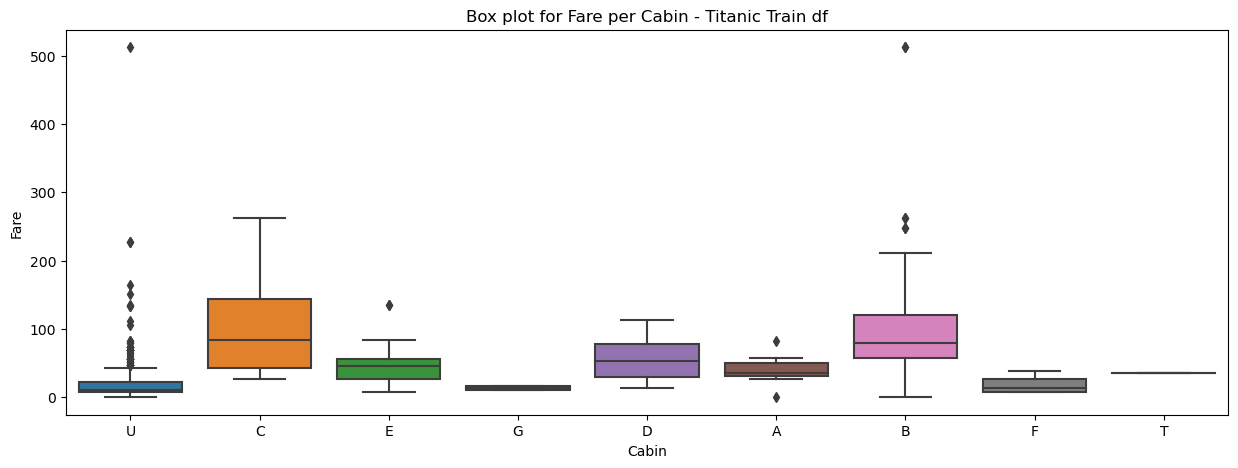

In [31]:
# plot using box plot to check for outliers of Fare for the Unknown Cabins (Train df)
plt.figure(figsize=(15,5))
plt.title("Box plot for Fare per Cabin - Titanic Train df")
sns.boxplot(x='Cabin', y='Fare',data=titanic_train_df)
plt.show()

In [32]:
def cbnFareDataToDataFrame(titanic_df):
  CntCbnFare, MinCbnFare, MaxCbnFare, AvgCbnFare, MedianCbnFare, ModeCbnFare = [],[],[],[],[],[]
  for cbn in titanic_df['Cabin'].unique(): #'ABCDEFGTU':
    condition = (titanic_df['Cabin'] == cbn) & (titanic_df['Fare']!=0)

    #strCbnFareInfo = "For Cabin: " + cbn

    cnt=titanic_df[condition]['Fare'].count()
    #strCbnFareInfo += " ===> Count=" + str(cnt)
    CntCbnFare.append(cnt)

    min_=round(titanic_df[condition]['Fare'].min(),2)
    #strCbnFareInfo += ", Min Fare=" + str(min)
    MinCbnFare.append(min_)

    max_=round(titanic_df[condition]['Fare'].max(),2)
    #strCbnFareInfo += ", Max=" + str(max_)
    MaxCbnFare.append(max_)

    Mean_=round(titanic_df[condition]['Fare'].mean(),2)
    #strCbnFareInfo += ", Mean=" + str(Mean_)
    AvgCbnFare.append(Mean_)

    Median_=round(titanic_df[condition]['Fare'].median(),2)
    #strCbnFareInfo += ", Median=" + str(Median_)
    MedianCbnFare.append(Median_)

    Mode_=round(titanic_df[condition]['Fare'].mode().mean(),2)
    #strCbnFareInfo += ", Mode=" + str(Mode_)
    ModeCbnFare.append(Mode_)

  #print(strCbnFareInfo)

  dict = {'Cbn': list(titanic_df['Cabin'].unique()), 'Count': CntCbnFare, 'Min': MinCbnFare, 'Max': MaxCbnFare, 'Mean': AvgCbnFare, 'Median': MedianCbnFare, 'Mode': ModeCbnFare}
  cbnFareDf = pd.DataFrame(dict)
  cbnFareDf.head(len(titanic_df['Cabin'].unique()))

  #print(cbnFareDf.sort_values(by=['Median','Mean', 'Mode'], ascending=[True,True, True]))
  return cbnFareDf

In [33]:
cbnFareTrainDf = cbnFareDataToDataFrame(titanic_train_df)
#cbnFareDf.head(len('ABCDEFGTU'))
print(cbnFareTrainDf.sort_values(by=['Mean','Median','Mode'], ascending=[False,False, False]))

  Cbn  Count    Min     Max    Mean  Median    Mode
6   B     45   5.00  512.33  118.55   80.00  120.00
1   C     59  26.55  263.00  100.15   83.47  126.52
4   D     33  12.88  113.28   57.24   53.10   80.13
2   E     32   8.05  134.50   46.03   45.18   44.16
5   A     14  26.00   81.86   42.45   37.55   35.50
8   T      1  35.50   35.50   35.50   35.50   35.50
0   U    675   4.01  512.33   19.50   11.13    8.05
7   F     13   7.65   39.00   18.70   13.00   16.82
3   G      4  10.46   16.70   13.58   13.58   13.58


In [34]:
# first obsevation (only for titanic train) that there is only one entry for cabin T so high probability
# it is a data-issue - will fix to Cabin A as same Mode & closed Median & Mean
titanic_train_df.loc[titanic_train_df['Cabin'] == 'T', 'Cabin'] = 'A'

cbnFareTrainDf = cbnFareDataToDataFrame(titanic_train_df)
print(cbnFareTrainDf.sort_values(by=['Mean','Median','Mode'], ascending=[False,False, False]))

  Cbn  Count    Min     Max    Mean  Median    Mode
6   B     45   5.00  512.33  118.55   80.00  120.00
1   C     59  26.55  263.00  100.15   83.47  126.52
4   D     33  12.88  113.28   57.24   53.10   80.13
2   E     32   8.05  134.50   46.03   45.18   44.16
5   A     15  26.00   81.86   41.99   35.50   35.50
0   U    675   4.01  512.33   19.50   11.13    8.05
7   F     13   7.65   39.00   18.70   13.00   16.82
3   G      4  10.46   16.70   13.58   13.58   13.58


In [35]:
# second obsevation that there are many entries for cabin U which has many outliers (also from the above boxplot)
# so fix this data issue by assigning a different cabin based on fare Mean
#print(cbnFareTrainDf.sort_values(by=['Max'], ascending=[False]))

In [36]:
cndTrain1 = (titanic_train_df['Cabin'] == 'U')

cndTrain2 = (titanic_train_df['Fare'] > 100.15)
titanic_train_df.loc[cndTrain1 & cndTrain2, 'Cabin'] = 'B'

cndTrain2 = (titanic_train_df['Fare'] <= 100.15) & (titanic_train_df['Fare'] > 57.24)
titanic_train_df.loc[cndTrain1 & cndTrain2, 'Cabin'] = 'C'

cndTrain2 = (titanic_train_df['Fare'] <= 57.24) & (titanic_train_df['Fare'] > 46.03)
titanic_train_df.loc[cndTrain1 & cndTrain2, 'Cabin'] = 'D'

cndTrain2 = (titanic_train_df['Fare'] <= 46.03) & (titanic_train_df['Fare'] > 41.99)
titanic_train_df.loc[cndTrain1 & cndTrain2, 'Cabin'] = 'E'

cndTrain2 = (titanic_train_df['Fare'] <= 41.99) & (titanic_train_df['Fare'] > 18.70)
titanic_train_df.loc[cndTrain1 & cndTrain2, 'Cabin'] = 'A'

cndTrain2 = (titanic_train_df['Fare'] <= 18.70) & (titanic_train_df['Fare'] > 13.58)
titanic_train_df.loc[cndTrain1 & cndTrain2, 'Cabin'] = 'F'

cndTrain2 = (titanic_train_df['Fare'] <= 13.58) & (titanic_train_df['Fare'] > 7.65)
titanic_train_df.loc[cndTrain1 & cndTrain2, 'Cabin'] = 'G'

#print("For Training Data")
cbnFareTrainDf = cbnFareDataToDataFrame(titanic_train_df)
print(cbnFareTrainDf.sort_values(by=['Max'], ascending=[False]))

  Cbn  Count    Min     Max    Mean  Median    Mode
7   B     55   5.00  512.33  131.61   91.08  120.00
1   C     79  26.55  263.00   92.87   73.50   69.55
3   E     33   8.05  134.50   45.92   42.40   44.16
6   D     50  12.88  113.28   55.33   52.55   56.50
4   A    178  18.75   81.86   28.29   26.25   26.00
5   F     79   7.65   39.00   15.95   15.50   16.10
2   G    324   7.72   16.70    9.21    8.05    8.05
0   U     78   4.01    7.65    7.12    7.23    7.23


<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Box plot for Fare per Cabin')

<Axes: title={'center': 'Box plot for Fare per Cabin'}, xlabel='Cabin', ylabel='Fare'>

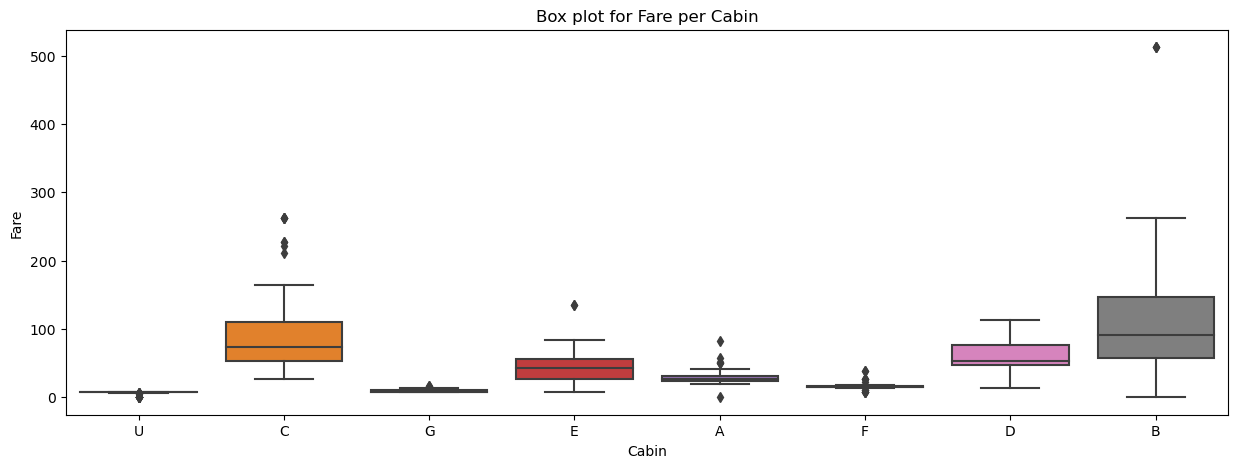

In [37]:
# plot using box plot to check for Fare per Cabin after above step (Train)
plt.figure(figsize=(15,5))
plt.title("Box plot for Fare per Cabin")
sns.boxplot(x='Cabin', y='Fare',data=titanic_train_df)
plt.show()

In [38]:
titanic_train_df2 = pd.get_dummies(titanic_train_df)
titanic_train_df2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,False,False,False,False,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,False,False,True,False,False,False,False,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,False,False,False,False,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True,False,False,False,False,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,False,False,False,False,True,False,False,False,True


### **C.1.2. Data split: Traing set & Test set**

In [39]:
X_tnc_train=titanic_train_df2.drop(['Survived'],axis=1)
y_tnc_train=titanic_train_df2['Survived']

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X_tnc_train,y_tnc_train,test_size=0.2)

# scale data separately for train and test
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **C.1.3. Applying Random Forest**

In [41]:
rfc= RandomForestClassifier(n_estimators=100,random_state=47)
rfc.fit(X_train_scaled,y_train)
y_train_predict_rfc=rfc.predict(X_train_scaled)

print("train accuracy_score", accuracy_score(y_train, y_train_predict_rfc))
print("train f1_score", f1_score(y_train, y_train_predict_rfc, average="macro"))
print("train precision_score",precision_score(y_train, y_train_predict_rfc, average="macro"))   # "macro" ---> does not take into account imbalance
print("train recall_score",recall_score(y_train, y_train_predict_rfc, average="macro"))
print("test rfc score",rfc.score(X_train_scaled,y_train))

RandomForestClassifier(random_state=47)

train accuracy_score 0.9915730337078652
train f1_score 0.9912341179946813
train precision_score 0.9912341179946813
train recall_score 0.9912341179946813
test rfc score 0.9915730337078652


In [42]:
y_test_predict_rfc = rfc.predict(X_test_scaled)
print("test accuracy_score", accuracy_score(y_test, y_test_predict_rfc))
print("test f1_score",f1_score(y_test, y_test_predict_rfc, average="macro"))
print("test precision_score",precision_score(y_test, y_test_predict_rfc, average="macro"))   # "macro" ---> does not take into account imbalance
print("test recall_score",recall_score(y_test, y_test_predict_rfc, average="macro"))
print("test rfc score",rfc.score(X_test_scaled,y_test))

test accuracy_score 0.7821229050279329
test f1_score 0.7565644941939533
test precision_score 0.7495951417004049
test recall_score 0.7685104529616724
test rfc score 0.7821229050279329


[  1   2   4   8  16  32  64 128 256]


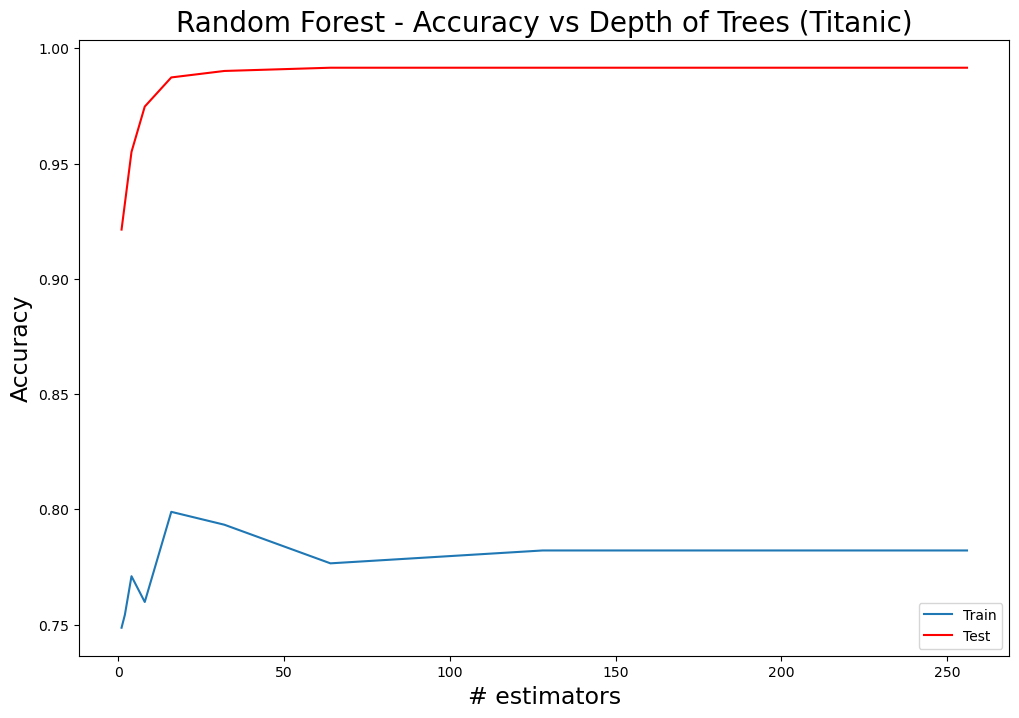

In [43]:
figsize = plt.figure(figsize = (12,8))
# Initialize the accuracy_score vector
acc = []              # test accuracy
acc_train = []        # train accuracy
estimators = 2 ** np.arange(9)
print(estimators)

# Calculate accuracy score on the test set for different values for the n_estimators parameter
for est in estimators:
    # Fit the Regression Tree
    rfc2 = RandomForestClassifier(n_estimators=est, random_state=47) #max_depth=i,
    rfc2.fit(X_train_scaled,y_train)
    # Predict on the test set
    y_pred = rfc2.predict(X_test_scaled)
    # Compute the accuracy
    score = accuracy_score(y_test, y_pred)
    acc.append(score)
    acc_train.append(accuracy_score(y_train, rfc2.predict(X_train_scaled)))

# Plot results
#print(acc)
#print(acc_train)
plot = plt.plot(estimators, acc, '-', estimators, acc_train, 'r')
#plot = plt.plot(estimators, acc_train, 'b', label='Train')
#plot = plt.plot(estimators, acc, 'r', label='Test')
xlab = plt.xlabel('# estimators', fontsize = 17)
ylab = plt.ylabel('Accuracy', fontsize = 17)
plt.legend(['Train','Test'])
title = plt.title('Random Forest - Accuracy vs Depth of Trees (Titanic)', fontsize = 20);

#### ***Random Forest Accuracy Results***

In [44]:
# best value for estimators:
print("Using Random forest with different number of estimators, best accuracy was at", max(acc),"and it occurs when estimators=", estimators[acc.index(max(acc))])

Using Random forest with different number of estimators, best accuracy was at 0.7988826815642458 and it occurs when estimators= 16


### **C.1.4. Applying SVM**

In [45]:
svc=SVC(C=1000) #kernel='rbf',
svc.fit(X_train_scaled,y_train)

SVC(C=1000)

In [46]:
y_train_predict_svc=svc.predict(X_train_scaled)

print("train accuracy_score", accuracy_score(y_train, y_train_predict_svc))
print("train f1_score", f1_score(y_train, y_train_predict_svc, average="macro"))
print("train precision_score",precision_score(y_train, y_train_predict_svc, average="macro"))   # "macro" ---> does not take into account imbalance
print("train recall_score",recall_score(y_train, y_train_predict_svc, average="macro"))
print("test svc score",svc.score(X_train_scaled,y_train))

train accuracy_score 0.9157303370786517
train f1_score 0.910507792860734
train precision_score 0.922222604270536
train recall_score 0.9031484946977905
test svc score 0.9157303370786517


In [47]:
y_test_predict_svc = svc.predict(X_test_scaled )
print("test accuracy_score", accuracy_score(y_test, y_test_predict_svc))
print("test f1_score",f1_score(y_test, y_test_predict_svc, average="macro"))
print("test precision_score",precision_score(y_test, y_test_predict_svc, average="macro"))   # "macro" ---> does not take into account imbalance
print("test recall_score",recall_score(y_test, y_test_predict_svc, average="macro"))
print("test svc score",svc.score(X_test_scaled,y_test))

test accuracy_score 0.8044692737430168
test f1_score 0.775809626051172
test precision_score 0.772316384180791
test recall_score 0.7799070847851336
test svc score 0.8044692737430168


[  1   2   4   8  16  32  64 128 256]


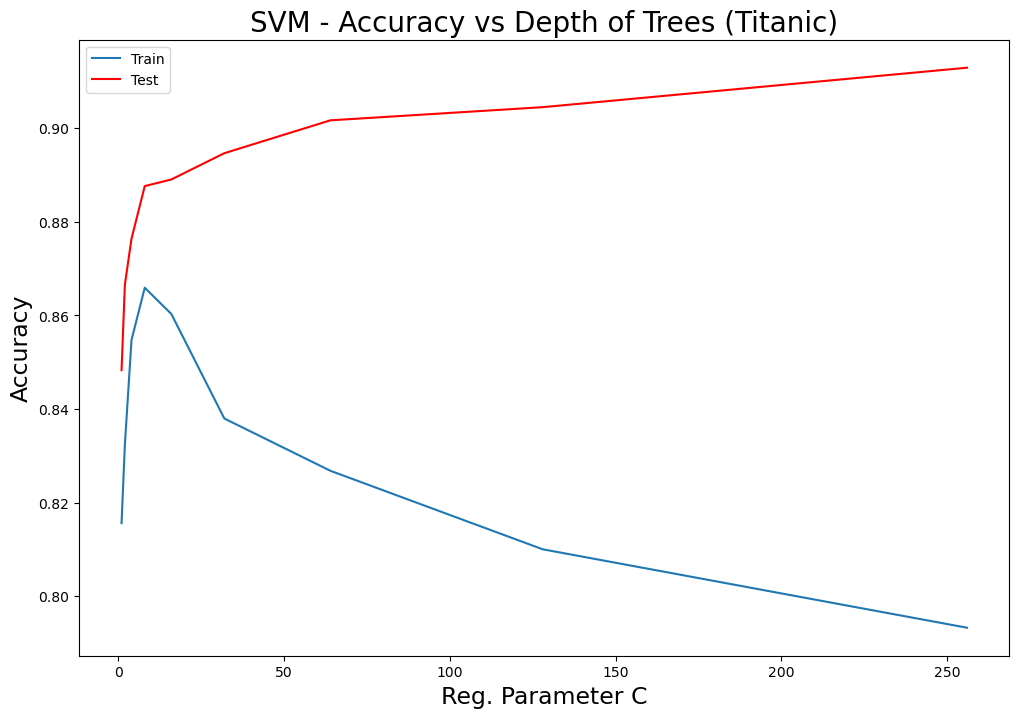

In [48]:
figsize = plt.figure(figsize = (12,8))
# Initialize the accuracy_score vector
acc = []              # test accuracy
acc_train = []        # train accuracy
reglCs = 2 ** np.arange(9)
print(reglCs)

# Calculate accuracy score on the test set for different values for the regularization parameter C
for C_param in reglCs:
    # Fit the Regression Tree
    svc2 = SVC(C=C_param) #max_depth=i,
    svc2.fit(X_train_scaled,y_train)
    # Predict on the test set
    y_pred = svc2.predict(X_test_scaled)
    # Compute the accuracy
    score = accuracy_score(y_test, y_pred)
    acc.append(score)
    acc_train.append(accuracy_score(y_train, svc2.predict(X_train_scaled)))

# Plot results
#print(acc)
#print(acc_train)
plot = plt.plot(reglCs, acc, '-', reglCs, acc_train, 'r')
#plot = plt.plot(reglCs, acc_train, 'b', label='Train')
#plot = plt.plot(reglCs, acc, 'r', label='Test')
xlab = plt.xlabel('Reg. Parameter C', fontsize = 17)
ylab = plt.ylabel('Accuracy', fontsize = 17)
plt.legend(['Train','Test'])
title = plt.title('SVM - Accuracy vs Depth of Trees (Titanic)', fontsize = 20);

#### ***SVM Accuracy Results***

In [49]:
# best value for estimators:
print("Using SVM with different values for the regularization parameter C, best accuracy was at", max(acc),"and it occurs when C=", reglCs[acc.index(max(acc))])

Using SVM with different values for the regularization parameter C, best accuracy was at 0.8659217877094972 and it occurs when C= 8


# Prediction

In [50]:
titanic_test_df = pd.read_csv(r'.\Data\titanic_test.csv')
titanic_test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [51]:
titanic_test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [52]:
[x for x in titanic_train_df.columns if x not in titanic_test_df.columns] 

['Survived']

In [53]:
[x for x in titanic_test_df.columns if x not in titanic_train_df.columns] 

['PassengerId', 'Name', 'Ticket']

In [54]:
titanic_test_df.shape

(418, 11)

In [55]:
psngID_series = titanic_test_df['PassengerId']
psngID_series, type(psngID_series)

(0       892
 1       893
 2       894
 3       895
 4       896
        ... 
 413    1305
 414    1306
 415    1307
 416    1308
 417    1309
 Name: PassengerId, Length: 418, dtype: int64,
 pandas.core.series.Series)

###  Align Features: To ensure feature alignment between the training and test datasets

In [56]:
# List of columns in the training dataset
train_columns = list(titanic_train_df.iloc[:,1:].columns)  # exclude the first column which is the "predict/label" column for Survived?

# Reorder columns in the test dataset to match the training dataset
titanic_test_df = titanic_test_df[train_columns]

# Check if both datasets have the same columns
if list(titanic_test_df.columns) == train_columns:
    print("Columns are aligned.")
else:
    print("Columns are NOT aligned. Please check the datasets.")

Columns are aligned.


In [59]:
titanic_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Cabin     91 non-null     object 
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.3+ KB


In [60]:
# check for NULL values
if titanic_test_df.isnull().any().sum() > 0:
    print("There are:" , titanic_test_df.isnull().any().sum(), " Columns with Null values in the test data")
else:
    print("Train data is good - There is no Columns with null values in any of the columns")

titanic_test_df.isnull().any()

There are: 3  Columns with Null values in the test data


Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare         True
Cabin        True
Embarked    False
dtype: bool

In [61]:
titanic_test_df.describe(include = 'all')

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,418.000000,418,332.000000,418.000000,418.000000,417.000000,91,418
unique,NaN,2,NaN,NaN,NaN,NaN,76,3
top,NaN,male,NaN,NaN,NaN,NaN,B57 B59 B63 B66,S
freq,NaN,266,NaN,NaN,NaN,NaN,3,270
mean,2.265550,NaN,30.272590,0.447368,0.392344,35.627188,NaN,NaN
std,0.841838,NaN,14.181209,0.896760,0.981429,55.907576,NaN,NaN
min,1.000000,NaN,0.170000,0.000000,0.000000,0.000000,NaN,NaN
25%,1.000000,NaN,21.000000,0.000000,0.000000,7.895800,NaN,NaN
50%,3.000000,NaN,27.000000,0.000000,0.000000,14.454200,NaN,NaN
75%,3.000000,NaN,39.000000,1.000000,0.000000,31.500000,NaN,NaN


In [62]:
# don't do below step in the test dataset
'''
print ("titanic_test_df:")
print("duplicated records", titanic_test_df.duplicated().sum())

# Remove duplicate rows
titanic_test_df = titanic_test_df[~titanic_test_df.duplicated()]
'''

'\nprint ("titanic_test_df:")\nprint("duplicated records", titanic_test_df.duplicated().sum())\n\n# Remove duplicate rows\ntitanic_test_df = titanic_test_df[~titanic_test_df.duplicated()]\n'

In [63]:
titanic_test_df.isnull().any()

Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare         True
Cabin        True
Embarked    False
dtype: bool

In [64]:
len(titanic_test_df[titanic_test_df.isnull().any(axis=1)])

331

In [ ]:
# No records in titanic_test_df with Nan in Embarked feature

In [65]:
print("null values in the Cabin Feature:\n", titanic_test_df.isnull().sum()['Cabin'], "Records")

null values in the Cabin Feature:
 327 Records


In [66]:
titanic_test_df['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [67]:
# keep first letter only in the Cabin
titanic_test_df['Cabin'] = titanic_test_df['Cabin'].str[0]
titanic_test_df['Cabin'].unique()

array([nan, 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [68]:
# replace missing values in titanic_test_df['Cabin'] with letter 'U' for unknown
titanic_test_df['Cabin'].fillna('U', inplace=True)

titanic_test_df['Cabin'].unique()

array(['U', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [69]:
print("null values in the Age Feature:\n", titanic_test_df.isnull().sum()['Age'], "Records")

null values in the Age Feature:
 86 Records


In [70]:
# Fill missing/Nan values in Age with average age
titanic_test_df['Age'].fillna(titanic_test_df['Age'].mean(), inplace=True)  
print("null values in the Age Feature:\n", titanic_test_df.isnull().sum()['Age'], "Records")

null values in the Age Feature:
 0 Records


In [71]:
print("null values in the Fare Feature:\n", titanic_test_df.isnull().sum()['Fare'], "Records")

null values in the Fare Feature:
 1 Records


In [72]:
# Fill missing/Nan values in Age with average age
titanic_test_df['Fare'].fillna(titanic_test_df['Fare'].mean(), inplace=True)  
print("null values in the Fare Feature:\n", titanic_test_df.isnull().sum()['Fare'], "Records")

null values in the Fare Feature:
 0 Records


In [73]:
# Check again after fixing missing records
titanic_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Cabin     418 non-null    object 
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.3+ KB


In [74]:
print(titanic_test_df['Embarked'].value_counts())
# most passengers are emabrked from S = Southampton (Three ports of Embarkation C = Cherbourg; Q = Queenstown; S = Southampton)

# replace the 2 NULL values in embarked with S = Southampton (as most passengers on Titanic embarked from this port)
titanic_test_df.loc[titanic_test_df['Embarked'].isnull(),'Embarked'] = 'S'

print(titanic_test_df['Embarked'].value_counts())

titanic_test_df[titanic_test_df['Embarked'].isnull()]

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64
Embarked
S    270
C    102
Q     46
Name: count, dtype: int64


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked


In [75]:
titanic_test_df.describe(include = 'all')

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,418.000000,418,418.000000,418.000000,418.000000,418.000000,418,418
unique,NaN,2,NaN,NaN,NaN,NaN,8,3
top,NaN,male,NaN,NaN,NaN,NaN,U,S
freq,NaN,266,NaN,NaN,NaN,NaN,327,270
mean,2.265550,NaN,30.272590,0.447368,0.392344,35.627188,NaN,NaN
std,0.841838,NaN,12.634534,0.896760,0.981429,55.840500,NaN,NaN
min,1.000000,NaN,0.170000,0.000000,0.000000,0.000000,NaN,NaN
25%,1.000000,NaN,23.000000,0.000000,0.000000,7.895800,NaN,NaN
50%,3.000000,NaN,30.272590,0.000000,0.000000,14.454200,NaN,NaN
75%,3.000000,NaN,35.750000,1.000000,0.000000,31.500000,NaN,NaN


In [76]:
titanic_test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,U,Q
1,3,female,47.0,1,0,7.0000,U,S
2,2,male,62.0,0,0,9.6875,U,Q
3,3,male,27.0,0,0,8.6625,U,S
4,3,female,22.0,1,1,12.2875,U,S


In [77]:
print(titanic_test_df.dtypes)

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object


In [78]:
# first obsevation (only for titanic train) that there is only one entry for cabin T so high probability
# it is a data-issue - will fix to Cabin A as same Mode & closed Median & Mean
titanic_test_df.loc[titanic_test_df['Cabin'] == 'T', 'Cabin'] = 'A'

cbnFareTestDf = cbnFareDataToDataFrame(titanic_test_df)
print(cbnFareTestDf.sort_values(by=['Mean','Median','Mode'], ascending=[False,False, False]))

  Cbn  Count    Min     Max    Mean  Median    Mode
1   B     17  26.55  512.33  154.13   93.50  262.38
4   C     35  25.70  263.00  121.03   90.00  211.50
2   E      9  26.00  134.50   84.92   83.16  134.50
3   A      7  27.72   81.86   44.72   30.50   55.78
5   D     13  13.86   76.29   42.25   39.40   27.14
0   U    326   3.17  262.38   19.19   11.84    7.75
6   F      8   7.23   39.00   17.08   11.75   19.74
7   G      1  16.70   16.70   16.70   16.70   16.70


In [79]:
cndTest1 = (titanic_test_df['Cabin'] == 'U')

cndTest2 = (titanic_test_df['Fare'] > 100.15)
titanic_test_df.loc[cndTest1 & cndTest2, 'Cabin'] = 'B'

cndTest2 = (titanic_test_df['Fare'] <= 100.15) & (titanic_test_df['Fare'] > 57.24)
titanic_test_df.loc[cndTest1 & cndTest2, 'Cabin'] = 'C'

cndTest2 = (titanic_test_df['Fare'] <= 57.24) & (titanic_test_df['Fare'] > 46.03)
titanic_test_df.loc[cndTest1 & cndTest2, 'Cabin'] = 'D'

cndTest2 = (titanic_test_df['Fare'] <= 46.03) & (titanic_test_df['Fare'] > 41.99)
titanic_test_df.loc[cndTest1 & cndTest2, 'Cabin'] = 'E'

cndTest2 = (titanic_test_df['Fare'] <= 41.99) & (titanic_test_df['Fare'] > 18.70)
titanic_test_df.loc[cndTest1 & cndTest2, 'Cabin'] = 'A'

cndTest2 = (titanic_test_df['Fare'] <= 18.70) & (titanic_test_df['Fare'] > 13.58)
titanic_test_df.loc[cndTest1 & cndTest2, 'Cabin'] = 'F'

cndTest2 = (titanic_test_df['Fare'] <= 13.58) & (titanic_test_df['Fare'] > 7.65)
titanic_test_df.loc[cndTest1 & cndTest2, 'Cabin'] = 'G'

#print("For Test Data")
cbnFareTestDf = cbnFareDataToDataFrame(titanic_test_df)
print(cbnFareTestDf.sort_values(by=['Max'], ascending=[False]))

  Cbn  Count    Min     Max    Mean  Median    Mode
3   B     21  26.55  512.33  162.39  146.52  262.38
5   C     49  25.70  263.00  105.62   73.50  140.52
4   E     11  26.00  134.50   77.47   61.17  134.50
2   A     83  20.21   81.86   28.35   26.00   26.00
7   D     17  13.86   76.29   43.92   46.90   33.72
6   F     45   7.23   39.00   15.40   14.50   14.87
0   G    151   7.72   16.70    9.17    8.05    7.75
1   U     39   3.17    7.65    7.11    7.23    7.22


In [80]:
len(titanic_test_df[titanic_test_df.isnull().any(axis=1)])

0

In [81]:
titanic_test_df[titanic_test_df.isnull().any(axis=1)]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked


In [82]:
titanic_test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

###  Align Features: To ensure feature alignment between the training and test datasets

In [83]:
titanic_test_df2 = pd.get_dummies(titanic_test_df)
titanic_test_df2.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,False,True,False,False,False,False,False,False,True,False,False,True,False
1,3,47.0,1,0,7.0000,True,False,False,False,False,False,False,False,False,True,False,False,True
2,2,62.0,0,0,9.6875,False,True,False,False,False,False,False,False,True,False,False,True,False
3,3,27.0,0,0,8.6625,False,True,False,False,False,False,False,False,True,False,False,False,True
4,3,22.0,1,1,12.2875,True,False,False,False,False,False,False,False,True,False,False,False,True


### Applying transformation to the test dataset titanic_test_df2 using the pre-fitted scaler.

###  Align Features: To ensure feature alignment between the training and test datasets --- done in a previous step

In [84]:
X_req_test_scaled = scaler.transform(titanic_test_df2)

In [85]:
X_req_test_scaled

array([[ 0.83359659,  0.36773694, -0.47262674, ..., -0.48370322,
         3.18198052, -1.60558072],
       [ 0.83359659,  1.33778702,  0.45695956, ..., -0.48370322,
        -0.31426968,  0.62282761],
       [-0.3558238 ,  2.50184711, -0.47262674, ..., -0.48370322,
         3.18198052, -1.60558072],
       ...,
       [ 0.83359659,  0.67815297, -0.47262674, ..., -0.48370322,
        -0.31426968,  0.62282761],
       [ 0.83359659,  0.03967302, -0.47262674, ..., -0.48370322,
        -0.31426968,  0.62282761],
       [ 0.83359659,  0.03967302,  0.45695956, ...,  2.06738339,
        -0.31426968, -1.60558072]])

In [86]:
y_req_test_predict_svc = svc.predict(X_req_test_scaled)
y_req_test_predict_svc,len(y_req_test_predict_svc),type(y_req_test_predict_svc)

survived_series = pd.Series(pd.Series(y_req_test_predict_svc))

survived_series,len(survived_series),type(survived_series), survived_series.unique()

(array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
        0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 

(0      0
 1      0
 2      0
 3      0
 4      1
       ..
 413    0
 414    1
 415    0
 416    0
 417    0
 Length: 418, dtype: int64,
 418,
 pandas.core.series.Series,
 array([0, 1], dtype=int64))

In [87]:
survived_series.unique()

array([0, 1], dtype=int64)

In [94]:
# Add the PassengerId and survived_series as two new series to the DataFrame and enforce integer type
survived_series = survived_series.astype(int)
submision_result_svm_df = pd.DataFrame({"PassengerId" : psngID_series, "Survived" : survived_series})

In [95]:
submision_result_svm_df, submision_result_svm_df.dtypes

(     PassengerId  Survived
 0            892         0
 1            893         0
 2            894         0
 3            895         0
 4            896         1
 ..           ...       ...
 413         1305         0
 414         1306         1
 415         1307         0
 416         1308         0
 417         1309         0
 
 [418 rows x 2 columns],
 PassengerId    int64
 Survived       int32
 dtype: object)

In [98]:
# Write the DataFrame to a CSV file
submision_result_svm_df.to_csv(r'.\Data\output.csv', index=False)